True
                  sum_sq      df          F        PR(>F)
C(AUSPICE)  9.611211e+04     2.0  21.843051  5.057716e-10
Residual    2.332065e+06  1060.0        NaN           NaN
                             sum_sq      df          F        PR(>F)
C(AUSPICE)             8.567996e+03     2.0   2.057586  1.282730e-01
C(subsidy)             8.352744e+04     1.0  40.117876  3.529094e-10
C(AUSPICE):C(subsidy)  5.603445e+04     2.0  13.456555  1.694282e-06
Residual               2.202809e+06  1058.0        NaN           NaN
                  sum_sq      df          F        PR(>F)
C(subsidy)  1.607654e+05     1.0  75.227653  1.550892e-17
Residual    2.267412e+06  1061.0        NaN           NaN


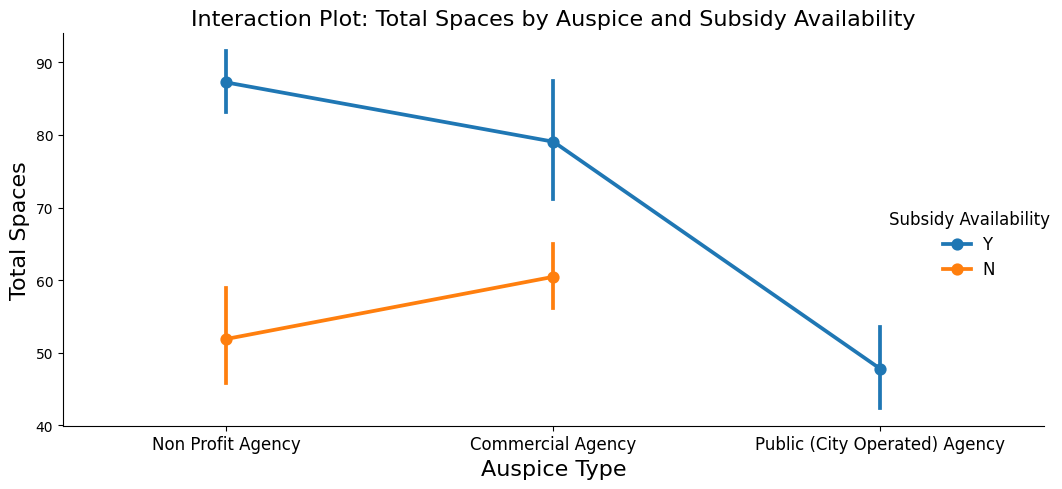

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
      group1                  group2            meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------------
Commercial Agency             Non Profit Agency  17.1194    0.0   9.7037  24.5351   True
Commercial Agency Public (City Operated) Agency -17.2152 0.0779 -35.8832   1.4528  False
Non Profit Agency Public (City Operated) Agency -34.3346    0.0 -52.4448 -16.2244   True
----------------------------------------------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     N      Y  26.2658   0.0 20.3236 32.208   True
--------------------------------------------------
                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
       group1             

In [2]:
file = 'INF2178_A2_data.xlsx'

import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import levene
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Read the first sheet in the Excel file
data = pd.read_excel(file, sheet_name=0)

# Calculate the overall centre capacity by summing age-specific spaces
data['CENTRECAPACITY'] = data['IGSPACE'] + data['TGSPACE'] + data['PGSPACE'] + data['KGSPACE'] + data['SGSPACE']
# Compare if 'CENTRECAPACITY' is the same as 'TOTSPACE'
comparison = data['CENTRECAPACITY'].equals(data['TOTSPACE'])
print(comparison)


# Build one-way ANOVA for total spaces by auspice group
model1 = ols('TOTSPACE ~ C(AUSPICE)', data=data).fit()
one_way_anova = sm.stats.anova_lm(model1, typ=2)
print(one_way_anova)


# Build two-way ANOVA with interaction between auspice group and subsidy availability
model2 = ols('TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE) * C(subsidy)', data=data).fit()
two_way_anova = sm.stats.anova_lm(model2, typ=2)
print(two_way_anova)

# Build one-way ANOVA for total spaces by subsidy availability
model3 = ols('TOTSPACE ~ C(subsidy)', data=data).fit()
one_way_anova2 = sm.stats.anova_lm(model3, typ=2)
print(one_way_anova2)

#The interaction plot for total spaces by auspice and subsidy availability
plot = sns.catplot(x="AUSPICE", y="TOTSPACE", hue="subsidy", kind="point", data=data, height=5, aspect=2)
plt.title('Interaction Plot: Total Spaces by Auspice and Subsidy Availability', fontsize=16)
plt.xlabel('Auspice Type', fontsize=16)
plt.ylabel('Total Spaces', fontsize=16)
plt.xticks(fontsize=12)
# Set the title and text font sizes
legend = plot._legend
legend.set_title('Subsidy Availability', prop={'size': 12})
for text in legend.texts:
    text.set_fontsize(12)
plt.tight_layout()
plt.show()


# Perform Tukey's HSD test for 'AUSPICE' and 'subsidy'
tukey_result_AUSPICE = pairwise_tukeyhsd(endog=data['TOTSPACE'], groups=data['AUSPICE'], alpha=0.05)
print(tukey_result_AUSPICE)
tukey_result_subsidy = pairwise_tukeyhsd(endog=data['TOTSPACE'], groups=data['subsidy'], alpha=0.05)
print(tukey_result_subsidy)

# Perform Tukey's HSD test for interaction between 'AUSPICE' and 'subsidy'
data['interaction'] = data['AUSPICE'] + ': ' + data['subsidy']
# Tukey's HSD
tukey_result = pairwise_tukeyhsd(endog=data['TOTSPACE'], groups=data['interaction'], alpha=0.05)
print(tukey_result)


# Test 2 assumptions for ANOVA: normality and homogeneity of variances
# Total space, auspice, and subsidy for the analysis
tot_space = data['TOTSPACE']
auspice_groups = data['AUSPICE'].unique()
subsidy_groups = data['subsidy'].unique()

# Normality test
# Create an empty dictionary for auspice normality test results
normality_tests = {}
for group in auspice_groups:
    group_data = data[data['AUSPICE'] == group]['TOTSPACE']
    stat, p = shapiro(group_data)
    normality_tests[group] = (stat, p)
print(normality_tests)
# Create an empty dictionary for subsidy normality test results
normality_tests = {}
for group in subsidy_groups:
    group_data = data[data['subsidy'] == group]['TOTSPACE']
    stat, p = shapiro(group_data)
    normality_tests[group] = (stat, p)
print(normality_tests)

# Homogeneity of variances test
# Create an empty list for auspice group samples
group_samples = []
for group in auspice_groups:
    group_data = data[data['AUSPICE'] == group]['TOTSPACE']
    group_samples.append(group_data)

# Create an empty list for subsidy group samples
group_samples2 = []
for group in subsidy_groups:
    group_data = data[data['subsidy'] == group]['TOTSPACE']
    group_samples2.append(group_data)

# Utilize Levene test for homogeneity of variances on auspice and subsidy group samples
homogeneity_test = levene(*group_samples)
print(homogeneity_test)
homogeneity_test2 = levene(*group_samples2)
print(homogeneity_test2)